In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Read the data from provided dir
!wget "https://raw.githubusercontent.com/DeepConnectAI/challenge-week-2/master/data/simple_linear_data.csv"

--2020-08-18 12:18:33--  https://raw.githubusercontent.com/DeepConnectAI/challenge-week-2/master/data/simple_linear_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2326 (2.3K) [text/plain]
Saving to: ‘simple_linear_data.csv.1’

simple_linear_data. 100%[===================>]   2.27K  --.-KB/s    in 0s      

2020-08-18 12:18:34 (40.6 MB/s) - ‘simple_linear_data.csv.1’ saved [2326/2326]



In [ ]:
data = pd.read_csv("/content/simple_linear_data.csv", header=0)
data = data[(data['G3']!=0)|((data['G2']==0)&(data['G3']==0))]
data

,G2,G3
0,30,30
1,25,30
2,40,50
3,70,75
4,50,50
...,...,...
390,45,45
391,80,80
392,40,35
393,60,50


In [ ]:
# Add column which has all 1s
# The idea is that weight corresponding to this column is equal to intercept
# This way it is efficient and easier to handle the bias/intercept term

#TASK 2
data.insert(0,"bias", 1)
data

,bias,G2,G3
0,1,30,30
1,1,25,30
2,1,40,50
3,1,70,75
4,1,50,50
...,...,...,...
390,1,45,45
391,1,80,80
392,1,40,35
393,1,60,50


In [ ]:
# Define X (input features) and y (output feature) 
data.dropna(0) #remove rows with NaN values
#X = data.drop(['G3'], axis = 1).to_numpy()

#TASK 1
X= data[['bias','G2']].to_numpy()
y = data['G3'].to_numpy()

In [ ]:
#TASK 4
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(370, 2)
y: Type-<class 'numpy.ndarray'>, Shape-(370,)


In [ ]:
#TASK 3
X[40:55],y[40:55]

(array([[ 1, 50],
        [ 1, 60],
        [ 1, 90],
        [ 1, 40],
        [ 1, 50],
        [ 1, 40],
        [ 1, 60],
        [ 1, 95],
        [ 1, 75],
        [ 1, 35],
        [ 1, 65],
        [ 1, 65],
        [ 1, 55],
        [ 1, 50],
        [ 1, 65]]),
 array([ 55,  60,  90,  55,  45,  30,  55, 100,  70,  35,  65,  65,  50,
         55,  65]))

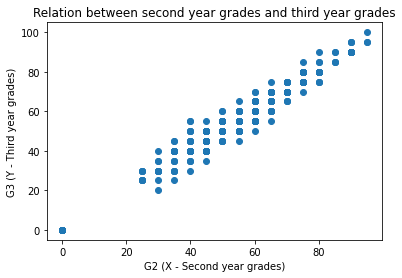

In [ ]:
# DO NOT EDIT THIS CODE CELL
plt.scatter(X[:,1],y)
plt.title('Relation between second year grades and third year grades')
plt.xlabel('G2 (X - Second year grades)')
plt.ylabel('G3 (Y - Third year grades)')
plt.show()

In [ ]:
  def predict(X, weights):
    '''
    weights   : array (2,1) w0 and w1
    X         : array (m,2) x0 (intercept=1) and x1
    
    Returns predicted y using hyothesis linear function defined by given weights
    '''
    ### START CODE HERE ###
    y_pred = X@weights
    ### END CODE HERE ###
    
    assert (y_pred.shape==(X.shape[0],)), 'Wrong implementation of predict function. Check carefully'
    
    return y_pred
#predict(X[:5],np.random.rand(2))
#y[:5]

In [ ]:
def mean_squared_error(y_true, y_pred) : 
    '''
    y_true : (m,1)
    y_pred : (m,1)
    
    Return the mean squared error
    '''
    ### START CODE HERE ###
    #from sklearn.metrics import mean_squared_error as mse
    #loss = mse(y_true, y_pred)
    a=np.zeros(len(y_true))
    for i in range(len(y_true)):
      a[i] = (y_true[i] - y_pred[i])**2
    s=np.sum(a)
    loss = s/len(y_true)
    ### END CODE HERE ###
    
    return loss
y_p=predict(X[:5],np.random.rand(2))
mean_squared_error(y[:5], y_p) 

In [ ]:
def gradient(X, y_true, y_pred):
    '''
    X      : array (m,2)
    y_true : array (m,1)
    y_pred : array (m,1)
    
    Returns a numpy array with gradients. Shape (2,1)
    '''
    # Initialize the gradient vector for w0 (intercept/bias) and w1 respectively
    grad = np.zeros(2,)
    
    ### START CODE HERE ###
    n=X.shape[0]
    #print(n)
    #grad[1] = (1/n) * np.sum(X[:,1]*(y_true - y_pred))
    #grad[0] = np.sum(X* (y_true - y_pred),1)
    grad[0] = np.mean((y_pred - y_true))
    grad[1] = np.mean((y_pred - y_true)*X[:,1])
    
    ### END CODE HERE ###
    
    return grad
#x= np.array([[1,2,3,4],[4,3,4,5]])
#x.shape[0]

In [ ]:
def gradient_descent(X, y, learning_rate=0.001, max_iterations=100):
    '''
    X              : Array (m,2)
    y              : Array (m,1)
    learning_rate  : Learning rate
    max_iterations : Maximum iteratons
    
    Returns : weights vector (2,1)
            : losses (List)
    '''
    # Initialise weights vector of random values of size (2,1)
    weights = np.random.rand(2)
    #weights = np.zeros(2,)
    # Initialize a list to record all the losses 
    losses  = []
    
    ### START CODE HERE ###
    for i in range(max_iterations):
      y_pred = predict(X,weights)
      #print(weights)
      dc,dm=gradient(X, y, y_pred) #dc=intercept part derivative dm=slope part derivative
      #print("grad",dc,dm)
      losses.append(mean_squared_error(y,y_pred))
      weights[0] = weights[0] - learning_rate*dc
      weights[1] = weights[1] - learning_rate*dm
    ### END CODE HERE ###
    
    return weights, losses

In [ ]:
# Perform gradient descent
optimal_weights, losses = gradient_descent(X, y, 0.00001,100)
optimal_weights

array([0.81494513, 0.98665149])

In [ ]:
# DO NOT CHANGE THE FOLLOWING CODE CELLS
# Print final loss
print("Mean squared error:", losses[-1])

Mean squared error: 17.590788222891735


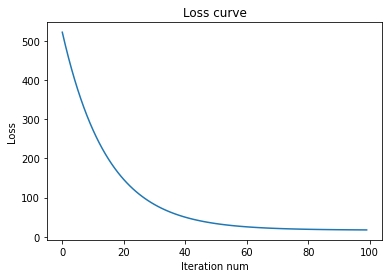

In [ ]:
# Plot the loss curve
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Make predictions using trained weights
y_pred = predict(X, optimal_weights)

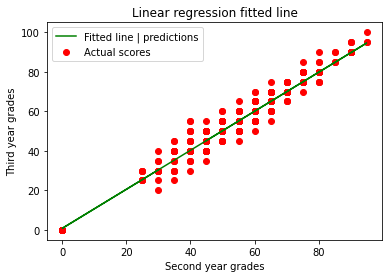

In [ ]:
# Visualize the results by plotting it
plt.scatter(X[:,1], y, c='r', label='Actual scores')
plt.plot(X[:,1], y_pred, c='g', label='Fitted line | predictions')
plt.legend()
plt.title("Linear regression fitted line")
plt.xlabel("Second year grades")
plt.ylabel("Third year grades")
plt.show()